In [70]:
import pandas as pd
from nltk.util import ngrams
import pandas as pd
from numpy import array
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

In [52]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wanga\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [4]:
# Read in the data
training = pd.read_csv('advanced_trainset.csv')
training

,Sentence,Sentiment
0,According to the Finnish-Russian Chamber of Co...,neutral
1,The Swedish buyout firm has sold its remaining...,neutral
2,$SPY wouldn't be surprised to see a green close,positive
3,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
4,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
...,...,...
4377,Investments in product development stood at 6....,neutral
4378,HSBC Says Unit to Book $585 Million Charge on ...,negative
4379,RISING costs have forced packaging producer Hu...,negative
4380,"In the building and home improvement trade , s...",neutral


In [123]:
import pandas as pd
from numpy import array
from nltk import word_tokenize
from nltk.corpus import stopwords
from IPython.display import display

class csv():

    SENTENCE_INDEX = 'Sentence'
    STOP_WORDS = (' '.join(stopwords.words('english'))).lower().split(' ')
    PUNKT = ['.',',','-','(',')','$','%','r\'e','\'s','n\'t,', '\'d', 'v\'e', ':', '``', '&', "'"]

    def __init__(self,csv_file_path):
        self._csv = pd.read_csv(csv_file_path)

    '''
        Returns an individual entry from the csv
    '''
    def get_individual_entry(self,index):

        sentences = self._csv[self.SENTENCE_INDEX].values
        if index > len(sentences):
            raise ValueError('Index entered exceeds maximum number of entries in csv')

        return self._csv.iloc[index].values

    '''
        Removes the stop words from an individual sentence in the dataset
    '''
    def remove_stop_words(self,sentence):
        sentence = word_tokenize(sentence)
        corrected_sentence = ' '.join(list(filter(lambda word: word.lower() not in self.STOP_WORDS and word not in self.PUNKT,
                                                  sentence)))
        return corrected_sentence

    '''
        removes all stop words from the entire data set, replacing the sentences with their corrected version
    '''
    def remove_all_stop_words(self):
        self._csv[self.SENTENCE_INDEX] = self._csv[self.SENTENCE_INDEX].apply(self.remove_stop_words)

    def get_proportion_label(self,label,value):
        return sum(array(self._csv[label].values) == value)/len(self._csv[label].values)
    
    def get_csv(self):
        return self._csv

if __name__ == 'main':
    csv_file_path = 'advanced_trainset.csv'
    reader = csv(csv_file_path)

    label = 'Sentiment'
    value = 'negative'

    index = 435
    reader.remove_all_stop_words()
    example_corrected_sentence = reader.get_individual_entry(index)
    print(example_corrected_sentence)

In [124]:
data = csv('advanced_trainset.csv')
data.remove_all_stop_words()
no_stop = data.get_csv()
no_stop

,Sentence,Sentiment
0,According Finnish-Russian Chamber Commerce maj...,neutral
1,Swedish buyout firm sold remaining 22.4 percen...,neutral
2,SPY would n't surprised see green close,positive
3,Shell 70 Billion BG Deal Meets Shareholder Ske...,negative
4,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
...,...,...
4377,Investments product development stood 6.0 mln ...,neutral
4378,HSBC Says Unit Book 585 Million Charge Settlement,negative
4379,RISING costs forced packaging producer Huhtama...,negative
4380,building home improvement trade sales decrease...,neutral


In [129]:
class Ngrams:
    def __init__(self, ngram, data):
        self.ngram = ngram
        self.data = data
#     def myfunction(ngrams):
#         print('The ngram is ' + str(ngrams.ngram))
    def split_labels(self):
        '''
        Split the dataset into each sentiment
        '''
        self.positive = self.data[self.data['Sentiment'] == 'positive']
        self.negative = self.data[self.data['Sentiment'] == 'negative']
        self.neutral = self.data[self.data['Sentiment'] == 'neutral']
#         print(self.positive.head())
#         print(self.negative.head())
#         print(self.neutral.head())
    def get_positive_ngram(self):
        '''
        Return a table of positive sentiment with a new column with all the ngrams
        '''
        if self.ngram == 1:
            self.positive[str(self.ngram) + ' gram'] = self.positive['Sentence'].apply(lambda x: list(ngrams(x.split(), 1)))
            self.positive[str(self.ngram) + ' gram'] = self.positive[str(self.ngram) + ' gram'].apply(lambda x: [a[0] for a in x])
        if self.ngram == 2:
            self.positive[str(self.ngram) + ' gram'] = self.positive['Sentence'].apply(lambda x: list(ngrams(x.split(), 2)))
            self.positive[str(self.ngram) + ' gram'] = self.positive[str(self.ngram) + ' gram'].apply(lambda x: [" ".join(a) for a in x])
        return self.positive
    def plot_positive_ngram_frequency(self):
        series_form = self.positive[str(self.ngram) + ' gram'].apply(pd.Series).stack()
        fdist_dict = FreqDist(series_form)
        fdist_dict.plot(20, cumulative = False)
        
    def get_negative_ngram(self):
        '''
        Return a table of positive sentiment with a new column with all the ngrams
        '''
        if self.ngram == 1:
            self.negative[str(self.ngram) + ' gram'] = self.negative['Sentence'].apply(lambda x: list(ngrams(x.split(), 1)))
            self.negative[str(self.ngram) + ' gram'] = self.negative[str(self.ngram) + ' gram'].apply(lambda x: [a[0] for a in x])
        if self.ngram == 2:
            self.negative[str(self.ngram) + ' gram'] = self.negative['Sentence'].apply(lambda x: list(ngrams(x.split(), 2)))
            self.negative[str(self.ngram) + ' gram'] = self.negative[str(self.ngram) + ' gram'].apply(lambda x: [" ".join(a) for a in x])
        return self.positive
    def plot_negative_ngram_frequency(self):
        series_form = self.negative[str(self.ngram) + ' gram'].apply(pd.Series).stack()
        fdist_dict = FreqDist(series_form)
        fdist_dict.plot(20, cumulative = False)
        
        
    def get_entire_ngram(self):
        '''
        Return a table of positive sentiment with a new column with all the ngrams
        '''
        if self.ngram == 1:
            self.data[str(self.ngram) + ' gram'] = self.data['Sentence'].apply(lambda x: list(ngrams(x.split(), 1)))
            self.data[str(self.ngram) + ' gram'] = self.data[str(self.ngram) + ' gram'].apply(lambda x: [a[0] for a in x])
        if self.ngram == 2:
            self.data[str(self.ngram) + ' gram'] = self.data['Sentence'].apply(lambda x: list(ngrams(x.split(), 2)))
            self.data[str(self.ngram) + ' gram'] = self.data[str(self.ngram) + ' gram'].apply(lambda x: [" ".join(a) for a in x])
        return self.data
    def plot_entire_ngram_frequency(self):
        series_form = self.data[str(self.ngram) + ' gram'].apply(pd.Series).stack()
        fdist_dict = FreqDist(series_form)
        fdist_dict.plot(20, cumulative = False)
        freq_table = pd.DataFrame.from_dict(fdist_dict, orient = 'index')
        freq_table = freq_table.reset_index()
        freq_table = freq_table.sort_values(by = [0], ascending = False)
        freq_table = freq_table.reset_index(drop = True)
        return freq_table

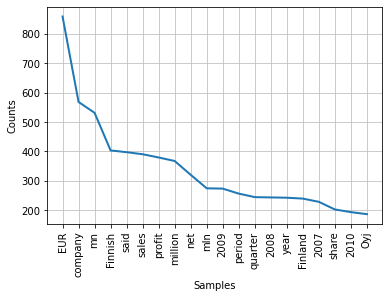

,index,0
0,EUR,859
1,company,568
2,mn,531
3,Finnish,403
4,said,397
5,sales,390
6,profit,379
7,million,367
8,net,320
9,mln,274


In [130]:
n = Ngrams(1, no_stop)
n.split_labels()
entire = n.get_entire_ngram()
entire = n.plot_entire_ngram_frequency()
entire.head(50)

In [142]:
entire[entire[0] > 50]

,index,0
0,EUR,859
1,company,568
2,mn,531
3,Finnish,403
4,said,397
...,...,...
111,area,52
112,lower,52
113,including,51
114,time,51


C:\Users\wanga\AppData\Local\Temp/ipykernel_8304/1139464750.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.positive[str(self.ngram) + ' gram'] = self.positive['Sentence'].apply(lambda x: list(ngrams(x.split(), 1)))
C:\Users\wanga\AppData\Local\Temp/ipykernel_8304/1139464750.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.positive[str(self.ngram) + ' gram'] = self.positive[str(self.ngram) + ' gram'].apply(lambda x: [a[0] for a in x])


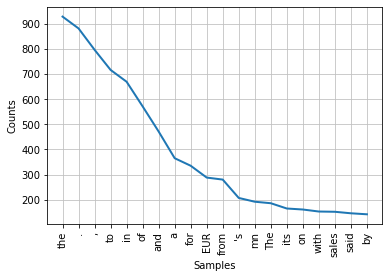

C:\Users\wanga\AppData\Local\Temp/ipykernel_8304/1139464750.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.negative[str(self.ngram) + ' gram'] = self.negative['Sentence'].apply(lambda x: list(ngrams(x.split(), 1)))
C:\Users\wanga\AppData\Local\Temp/ipykernel_8304/1139464750.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.negative[str(self.ngram) + ' gram'] = self.negative[str(self.ngram) + ' gram'].apply(lambda x: [a[0] for a in x])


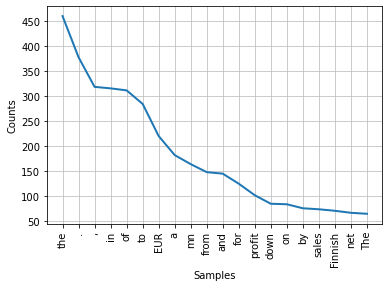

In [82]:
# Look at the unigram without dropping stop words
n = Ngrams(1, training)
n.split_labels()
positive = n.get_positive_ngram()
n.plot_positive_ngram_frequency()

negative = n.get_negative_ngram()
n.plot_negative_ngram_frequency()

C:\Users\wanga\AppData\Local\Temp/ipykernel_8304/1139464750.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.positive[str(self.ngram) + ' gram'] = self.positive['Sentence'].apply(lambda x: list(ngrams(x.split(), 2)))
C:\Users\wanga\AppData\Local\Temp/ipykernel_8304/1139464750.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.positive[str(self.ngram) + ' gram'] = self.positive[str(self.ngram) + ' gram'].apply(lambda x: [" ".join(a) for a in x])


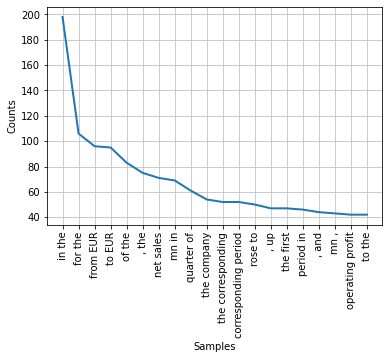

C:\Users\wanga\AppData\Local\Temp/ipykernel_8304/1139464750.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.negative[str(self.ngram) + ' gram'] = self.negative['Sentence'].apply(lambda x: list(ngrams(x.split(), 2)))
C:\Users\wanga\AppData\Local\Temp/ipykernel_8304/1139464750.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.negative[str(self.ngram) + ' gram'] = self.negative[str(self.ngram) + ' gram'].apply(lambda x: [" ".join(a) for a in x])


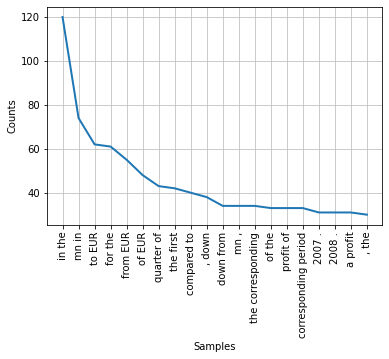

In [83]:
# Look at the bigram without dropping stop words
n = Ngrams(2, training)
n.split_labels()
positive = n.get_positive_ngram()
n.plot_positive_ngram_frequency()

negative = n.get_negative_ngram()
n.plot_negative_ngram_frequency()

C:\Users\wanga\AppData\Local\Temp/ipykernel_8304/1139464750.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.positive[str(self.ngram) + ' gram'] = self.positive['Sentence'].apply(lambda x: list(ngrams(x.split(), 1)))
C:\Users\wanga\AppData\Local\Temp/ipykernel_8304/1139464750.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.positive[str(self.ngram) + ' gram'] = self.positive[str(self.ngram) + ' gram'].apply(lambda x: [a[0] for a in x])


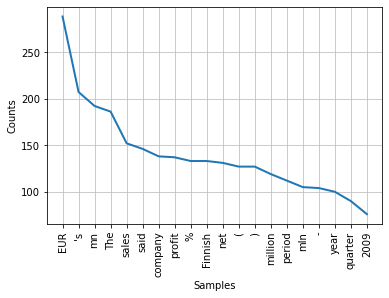

C:\Users\wanga\AppData\Local\Temp/ipykernel_8304/1139464750.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.negative[str(self.ngram) + ' gram'] = self.negative['Sentence'].apply(lambda x: list(ngrams(x.split(), 1)))
C:\Users\wanga\AppData\Local\Temp/ipykernel_8304/1139464750.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.negative[str(self.ngram) + ' gram'] = self.negative[str(self.ngram) + ' gram'].apply(lambda x: [a[0] for a in x])


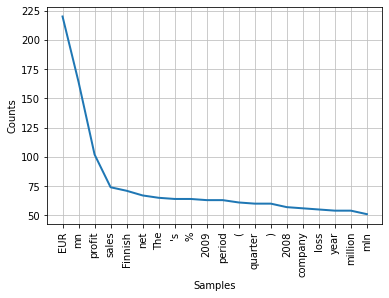

In [84]:
# Look at the unigram after dropping stop words
n = Ngrams(1, no_stop)
n.split_labels()
positive = n.get_positive_ngram()
n.plot_positive_ngram_frequency()

negative = n.get_negative_ngram()
n.plot_negative_ngram_frequency()

C:\Users\wanga\AppData\Local\Temp/ipykernel_8304/1139464750.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.positive[str(self.ngram) + ' gram'] = self.positive['Sentence'].apply(lambda x: list(ngrams(x.split(), 2)))
C:\Users\wanga\AppData\Local\Temp/ipykernel_8304/1139464750.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.positive[str(self.ngram) + ' gram'] = self.positive[str(self.ngram) + ' gram'].apply(lambda x: [" ".join(a) for a in x])


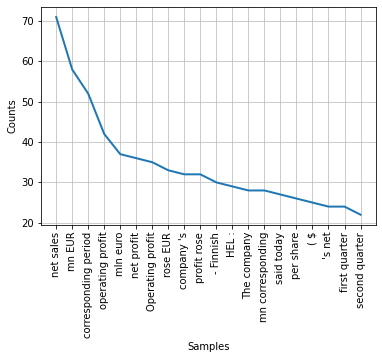

C:\Users\wanga\AppData\Local\Temp/ipykernel_8304/1139464750.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.negative[str(self.ngram) + ' gram'] = self.negative['Sentence'].apply(lambda x: list(ngrams(x.split(), 2)))
C:\Users\wanga\AppData\Local\Temp/ipykernel_8304/1139464750.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.negative[str(self.ngram) + ' gram'] = self.negative[str(self.ngram) + ' gram'].apply(lambda x: [" ".join(a) for a in x])


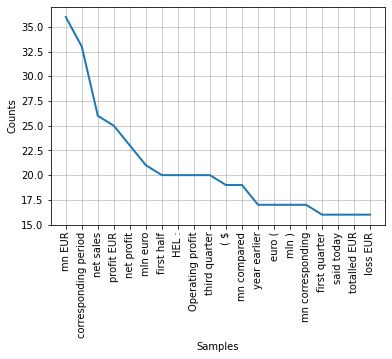

In [85]:
# Look at the bigram after dropping stop words
n = Ngrams(2, no_stop)
n.split_labels()
positive = n.get_positive_ngram()
n.plot_positive_ngram_frequency()

negative = n.get_negative_ngram()
n.plot_negative_ngram_frequency()

In [ ]:
########################## TF-IDF Implementation ###############################
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([documentA, documentB])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)